Data Visualization

데이터 품질 및 분포 특성을 시각적으로 확인하기 위해 사용
데이터 이해 및 분석 결과를 설득력 있게 표현하기 위해 사용

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
setosa_petal_length = iris[iris['species']=='setosa'][['petal_length']]

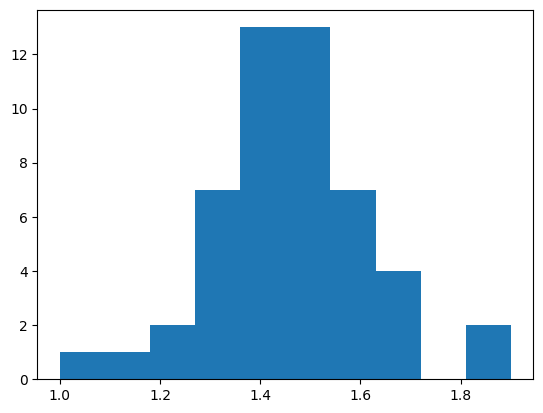

In [11]:
import matplotlib.pyplot as plt
plt.hist(setosa_petal_length)
plt.show()

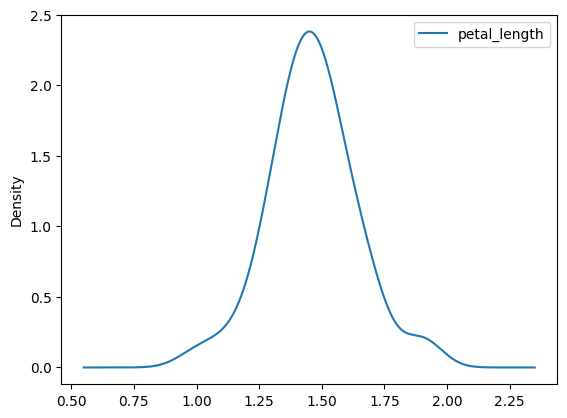

In [13]:
setosa_petal_length.plot.density()
plt.show()

커널 밀도 추정은 커널 함수를 이용한 밀도 추정 방법 중 하나

밀도 추정이란 추출된 데이터들을 이용해서 밀도 함수를 구하는 것



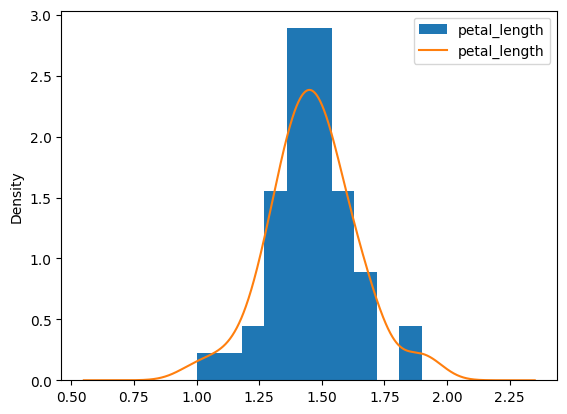

In [16]:
ax = setosa_petal_length.plot.hist(density=True)
setosa_petal_length.plot.density(ax=ax)
plt.show()

**왜도(Skewness, 비대칭도)??**
데이터의 분초에 따라서 오르쪽으로 치우쳤는지, 왼쪽으로 치우쳤는지를 확인!

Negative skewness: 데이터의 중심이 오른촉으로 치우쳤을 때  
Posivite skewness: 데이터의 중심이 왼쪽으로 치우쳤을 때

**점도(Kurtosis)**
데이터가 얼마나 평균에 많이 모여있는지를 나타내는 정도

Leptokurtic: 고첨 - 정규분포보다 많이 몰려있어서 뾰족  
Mesokurtic: 중첨 - 정규분포와 유사한 뾰족함  
Pltykurtic: 저첨 - 정규분포보다 완만한 뾰족함

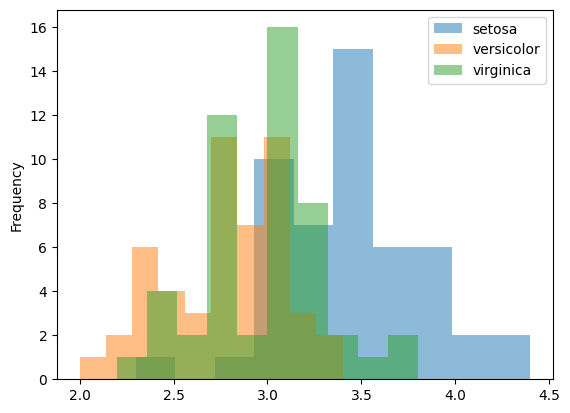

In [17]:
fig, ax = plt.subplots(1,1)

for species in iris['species'].unique():
    width_series = iris[iris['species']==species]['sepal_width']
    width_series.plot.hist(alpha = 0.5, ax=ax, label=species)
    
plt.legend()
plt.show()

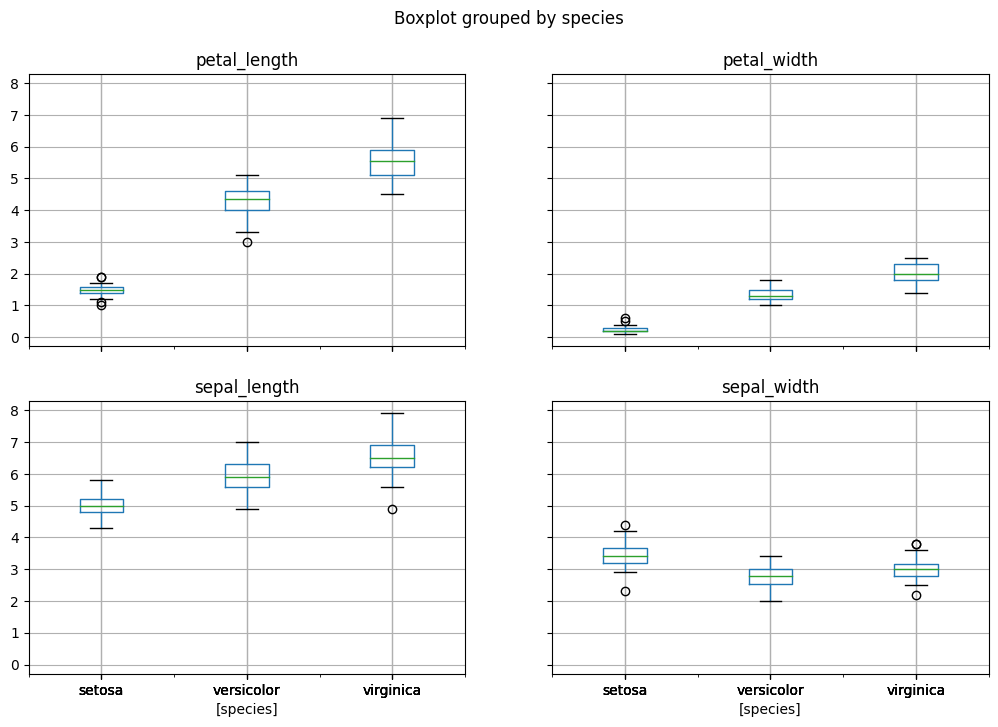

In [18]:
# Box Plot
iris.boxplot(by='species', layout=(2,2), figsize=(12,8))
plt.show()

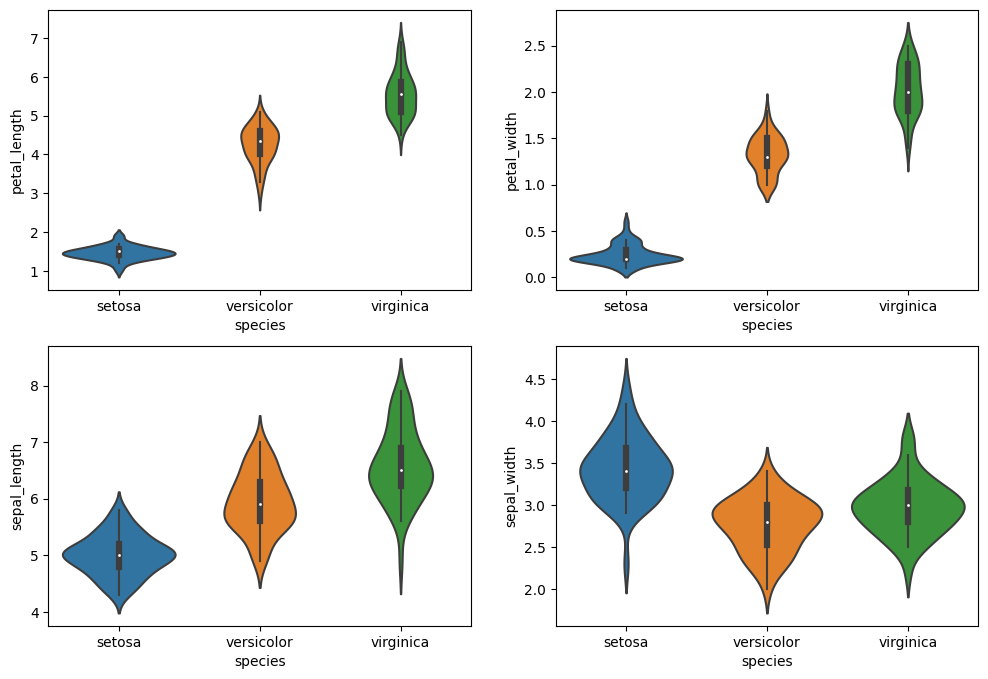

In [19]:
# Violin plot
fig, ax = plt.subplots(2,2, figsize=(12,8))

for i, col in enumerate(['petal_length','petal_width','sepal_length','sepal_width']):
  sns.violinplot(data=iris, x='species', y=col, ax=ax[i//2][i%2])

plt.show()      

### 데이터의 중심

***최빈값(mode)***
- 빈도가 가장 높은값
- 범주형 데이터의 대표값
- 2개 이상 존재 가능
- 극단적인 이상치에 영향을 적게 받는다

***중앙값(median)***
- 데이터를 내림차순하여 가장 중간에 있는 데이터
- 짝수개 일 경우에는 중앙의 두 값의 평균이 중앙값

***산술평균(mean)***
- 일반적으로 사용하는 평균
- 극단적인 이상치의 영향을 많이 받는 통계량
- 극단값의 영향을 줄이기 위해 절삭평균(양 끝단의 값을 일정 갯수 제거한 평균)을 사용

***가중평균***
- 각각의 데이터마다 중요도에 따라 가중치를 부여하여 합산한 값을 가중치의 합으로 나눔
- 산술평균은 모든 데이터의 가중치가 1(혹은 동일)하게 계산한 가중평균

***기하평균***
- 성장률이나 증가율과 같은 비율에 대한 데이터의 평균을 계산할 때 사용
- 음수나 0이 포함된 데이터에는 적용할 수 없음

***편차***
- 데이터값에서 평균을 빼준 값

***분산***
- 편차의 제곱의 합을 데이터 수로 나눈 값
- 편차를 다 더하면 0이 나오기 때문에 제곱한다
- 편차가 큰 데이터값에 대해 영향 정도를 키우기 위해 제곱한다

***표준편차***
- 분산의 제곱근

### 단어  
***모집단***
- 분석의 대상이 되는 전체집단

***표본집단***
- 모집단에서 추출된 모집단의 부분집합
- 모집단의 특성을 추정하기 위해서 통계적인 기법을 사용!

***모수***
- 모집단의 어떤 값

***통계량***
- 표본 집단의 정보

In [21]:
import numpy as np
data = np.arange(10,20,0.1)

In [22]:
data.mean()

14.949999999999982

In [23]:
sum_ = 0

for i in data:
    sum_ += i
sum_/len(data)

14.949999999999978

### 절삭 평균

In [24]:
from scipy.stats import trim_mean
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10])
mean_ = np.mean(data)
trim_mean_ = trim_mean(data, 0.1)
median = np.median(data)
print(f'''
mean = {mean_}
절삭평균 = {trim_mean_}
중앙값 = {median}
''')


mean = 3.7
절삭평균 = 3.25
중앙값 = 3.0



In [25]:
from scipy.stats import trim_mean
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10, 9999999999])
mean_ = np.mean(data)
trim_mean_ = trim_mean(data, 0.1)
median = np.median(data)
print(f'''
mean = {mean_}
절삭평균 = {trim_mean_}
중앙값 = {median}
''')


mean = 909090912.3636364
절삭평균 = 4.0
중앙값 = 3.0



In [26]:
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10, 9999999999])
data_length = len(data)

if data_length %2 == 0:
    idx = data_length//2
    median = (data[idx] + data[idx+1])/2

else:
    idx = data_length//2
    median = data[idx]

print('중앙값: ', median)

중앙값:  3


### 가중평균

In [29]:
data = np.array([10,20,30,40,50,60,70,80,90,100])
weights = np.array([0.1,0.05,0.3,0.05,0.15,0.025,0.025,0.05,0.125,0.175])

In [30]:
sum_ = 0
for idx in range(len(data)):
    sum_ += weights[idx]*data[idx]

print(sum_/sum(weights))

53.80952380952381


### 최빈값

In [34]:
data = np.array([1,1,2,2,2,3,4,5,6,7,7,7,7,7,8,8,9,10])
count_dict = dict()
for d in data:
  if d not in count_dict:
    count_dict[d] = 0
  else:
    count_dict[d] += 1

sorted(count_dict.items(), key=lambda x : x[1], reverse=True)[0][0]

7

### 편차 표준편차 분산

In [35]:
norm = np.random.normal(10.0, 2.0, 100)
norm.size

100

In [39]:
# 평균
norm_mean = norm.mean()
norm_mean

9.756929971945292

In [42]:
# 편차
norm_dev = [i-norm_mean for i in norm]

In [43]:
# 분산
norm_var = sum([i**2 for i in norm_dev])/(len(norm)-1)

In [44]:
# 표준편차
import math
math.sqrt(norm_var)

1.9742480609368553

In [45]:
np.std(norm)

1.964352018364276

### 기하평균

In [47]:
score_rate = [1.1, 2.1, 0.91, 0.14, 0.51]
mul_ = 1
for rate in score_rate:
  mul_ *= rate

geometric_mean = mul_**(1/len(score_rate))
geometric_mean

0.6843374651564551

In [48]:
import seaborn as sns
dataset = sns.get_dataset_names()

In [49]:
dataset

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [50]:
penguins = sns.load_dataset('penguins')

In [51]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [52]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [63]:
penguins[penguins['flipper_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [76]:
# 빈 값을 0으로 바꾸려면 ~
# penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(0)
# penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(0)
# penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(0)
# penguins['body_mass_g'] = penguins['body_mass_g'].fillna(0)

# 아예 빈 값을 제외하면
bill_length_mm = penguins[penguins['bill_length_mm'].isnull()==False]
bill_depth_mm = penguins[penguins['bill_depth_mm'].isnull()==False]
flipper_length_mm = penguins[penguins['flipper_length_mm'].isnull()==False]
body_mass_g = penguins[penguins['body_mass_g'].isnull()==False]

# 제일 데이터가 적은 sex 컬럼을 기준으로 잘라보니 빈 값이 없어서 가져옴
notnull_penguins = penguins[penguins['sex'].isnull()==False]

In [77]:
notnull_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


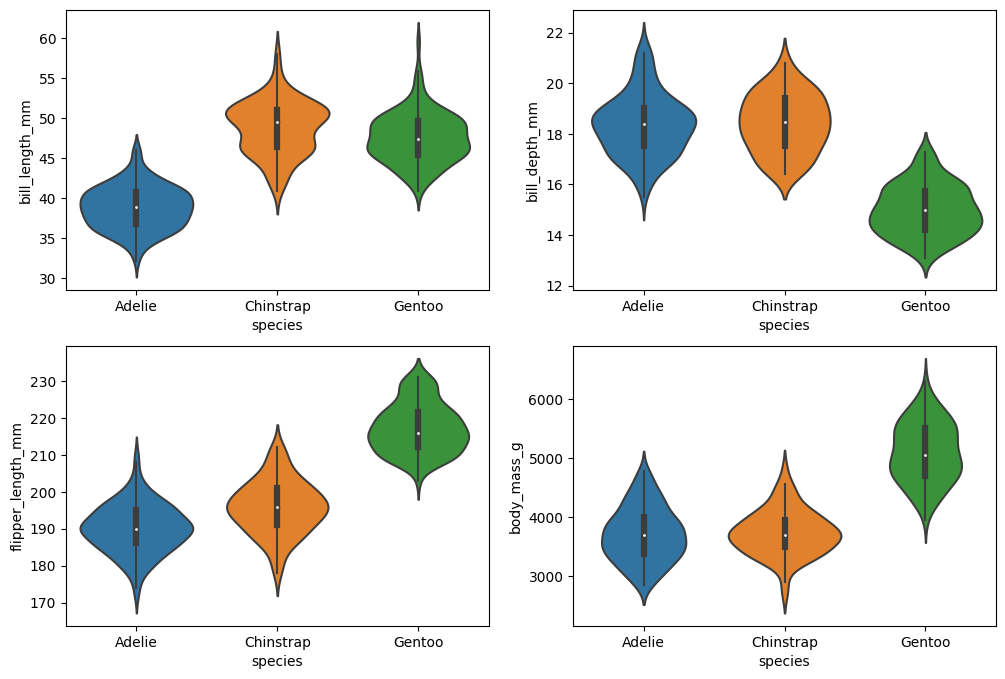

In [78]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

for i, col in enumerate(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']):
    sns.violinplot(data=notnull_penguins, x='species', y=col, ax=ax[i//2][i%2])

plt.show()

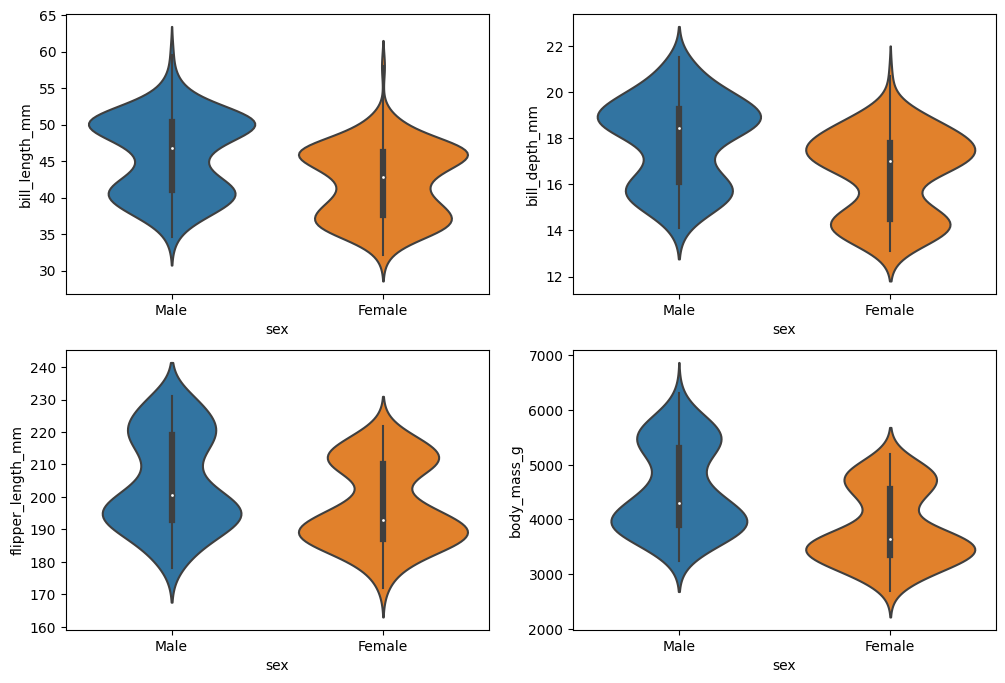

In [79]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

for i, col in enumerate(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']):
    sns.violinplot(data=notnull_penguins, x='sex', y=col, ax=ax[i//2][i%2])

plt.show()

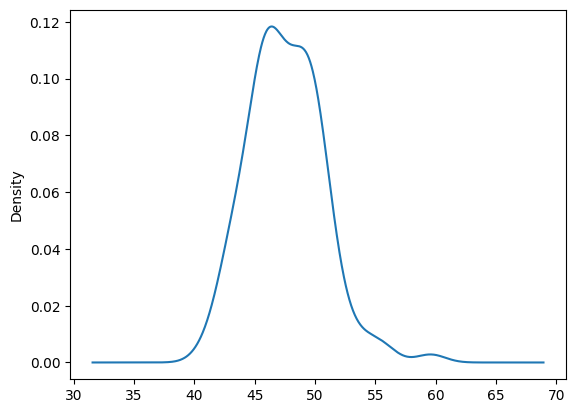

In [83]:
notnull_penguins[notnull_penguins['species']=='Gentoo']['bill_length_mm'].plot.density()
plt.show()